# Introduction to Machine Learning Exercise 3
## Problem 1
### a)
$$P(Y=+1 \mid X_1=1, X_2=2)\approx 0.3944$$

### b)

In [5]:
class_posterior <- function(x, mu_plus = 0, mu_minus = 0, sd_plus = 4, sd_minus = 1) {
    N_plus <- dnorm(x[1], mu_plus, sd_plus)*dnorm(x[2], mu_plus, sd_plus)
    N_minus <- dnorm(x[1], mu_minus, sd_minus)*dnorm(x[2], mu_minus, sd_minus)
    return(N_plus/(N_plus+N_minus))
}

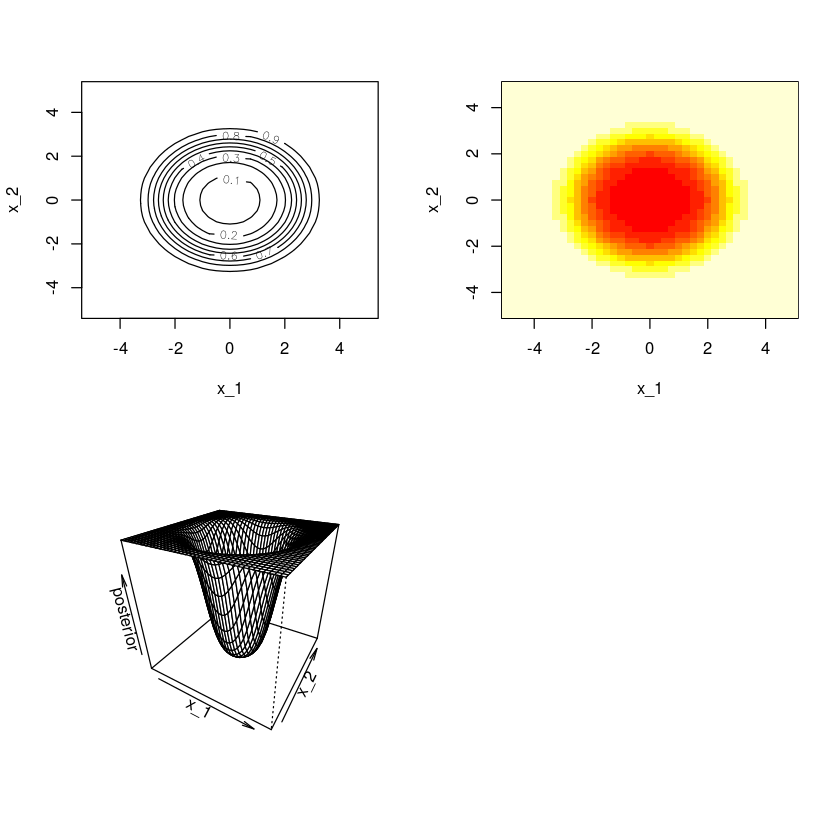

In [18]:
grid <- expand.grid(0.25*(-20:20), 0.25*(-20:20))
grid_values <- apply(grid, 1, class_posterior)
grid <- matrix(grid_values, nrow = length(0.25*(-20:20)))

par(mfrow = c(2,2))
contour(0.25*(-20:20), 0.25*(-20:20), grid, xlab = "x_1", ylab = "x_2")
image(0.25*(-20:20), 0.25*(-20:20), grid, xlab = "x_1", ylab = "x_2")
persp(0.25*(-20:20), 0.25*(-20:20), grid, xlab = "x_1", ylab = "x_2", zlab = "posterior", theta = 30, phi = 30)


### c)



## Problem 2
### a)



In [168]:
#Initialize X and Y values
create_dataset <- function(N) { # N is the number of data entries
    X <- matrix(0, nrow = N, ncol = 2)
    Y <- matrix(0, nrow = N, ncol = 1)

    for (i in 1:N) {
        Y[i] <- sample(0:2, size=1, replace=TRUE, prob=c(0.4,0.3,0.3))
    
        #X probabilities change depending on Y value
        if (Y[i] == 0) {
            X[i, ] <- t(expand.grid(0:1,0:2)[sample(1:6, 1, replace=TRUE, prob=c(0.2,0.1,0.4,0.2,0.0,0.1)),])
        } else if (Y[i] == 1) {
            X[i, ] <- t(expand.grid(0:1,0:2)[sample(1:6, 1, replace=TRUE, prob=c(0.6,0.1,0.1,0.1,0.1,0.0)),])
        } else {
            X[i, ] <- t(expand.grid(0:1,0:2)[sample(1:6, 1, replace=TRUE, prob=c(0.1,0.4,0.3,0.0,0.2,0.0)),])
        }
    }
    return(list("X" = X, "Y" = Y))
}

set.seed(48)

data <- create_dataset(100)
Y <- data$Y
X <- data$X

sum(Y==0) # number of Y=0
sum(X[ ,1] == 0 & X[ ,2] == 0) #number of X=(0,0)


[1] 40

[1] 30

### b)

In [155]:
naive_bayes <- function(X, Y, alpha) {
    n <- length(Y) #training set size
    prior <- c(0,0,0)
    conditional <- vector("list", length = 3) #three classes
    
    for (i in 0:2) { #three classes
        n_c <- sum(Y==i)
        prior[i+1] <- (n_c+alpha)/(n+3*alpha)
        for (j in 1:2) { #number of features is 2
            if (j == 1) {
                conditional[[i+1]][[j]] <- numeric(2) #X1 has two possible values
                for (k in 0:1) { 
                    conditional[[i+1]][[j]][k+1] <- (sum(Y==i & X[ ,j]==k)+alpha)/(n_c+2*alpha)
                }
            } else {
                conditional[[i+1]][[j]] <- numeric(3) #X2 has three possible values
                for (k in 0:2) {
                    conditional[[i+1]][[j]][k+1] <- (sum(Y==i & X[ ,j]==k)+alpha)/(n_c+3*alpha)
                }
            }
            
        }
    }
    return(list("prior" = prior, "conditional" = conditional))
}

In [166]:
for (i in c(0, 0.5, 1)) { # different values of alpha
    print(naive_bayes(X,Y,i)$prior)
}

[1] 0.4 0.3 0.3
[1] 0.3990148 0.3004926 0.3004926
[1] 0.3980583 0.3009709 0.3009709


### c)

In [179]:
bayes_test <- function(model, X) {
    n <- nrow(X) 
    probs <- matrix(0, nrow = n, ncol = 3) #three classes
    for (i in 1:n) { #go through the X data
        for (j in 1:3) { #go through the three classes in Y
            probs[i, j] <- model$prior[j] #the prior probability
            for (k in 1:2) { #go through the features X1 and X2
                probs[i,j] <- probs[i,j]*model$conditional[[j]][[k]][X[i,k]+1] # as in lecture notes
            }
        }
    }
    return(max.col(probs)-1) #returns index of maximum values for each row
}

In [189]:
classifier <- naive_bayes(X,Y, 1) #trained model
test_data <- create_dataset(10000)
predicted_Y <- bayes_test(classifier, test_data$X)


sum(predicted_Y != test_data$Y)/length(test_data$Y)

[1] 0.4007